In [1]:
import tensorflow as tf
import os, glob
import numpy as np

In [2]:
import cv2
import matplotlib.pyplot as plt

In [3]:
print(cv2.__version__)

4.5.2


In [4]:
def sorted_list(path):
    
    tmplist = glob.glob(path)
    tmplist.sort()
    
    return tmplist

def read_csv(path):

    df = pd.read_csv(path)
    
    return df

def load_npy(path):
    
    npy = np.load(path)
    
    return npy

def show_data(npy):
    
    num_channel = npy.shape[-1]
    plt.figure(figsize=(3*num_channel, 5))
    for channel in range(num_channel):
        tmpimg = npy[:, :, channel]
        plt.subplot(1, num_channel, channel+1)
        plt.imshow(tmpimg)
    plt.tight_layout()
    plt.show()
    plt.close()

In [5]:
path = '/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate'

In [6]:
list_data = sorted_list(os.path.join(path,'*.jpg'))

In [7]:
list_data

['/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/00009e5b390986a0.jpg',
 '/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/000228608388803f.jpg',
 '/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/0002a5b67e5f0909.jpg',
 '/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/00043e7c5c4c025a.jpg',
 '/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/0005ea10e0e14db1.jpg',
 '/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/0006dc0977056410.jpg',
 '/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/00071c51c8e92a68.jpg',
 '/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/00072b81abc72d21.jpg',
 '/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/0007870724402b51.jpg',
 '/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/000

In [8]:
list_data[:10]

['/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/00009e5b390986a0.jpg',
 '/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/000228608388803f.jpg',
 '/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/0002a5b67e5f0909.jpg',
 '/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/00043e7c5c4c025a.jpg',
 '/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/0005ea10e0e14db1.jpg',
 '/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/0006dc0977056410.jpg',
 '/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/00071c51c8e92a68.jpg',
 '/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/00072b81abc72d21.jpg',
 '/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/0007870724402b51.jpg',
 '/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/000

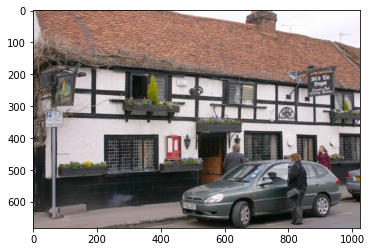

In [9]:
img = cv2.imread(list_data[0])

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

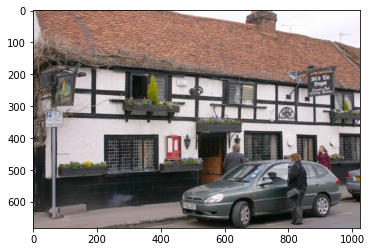

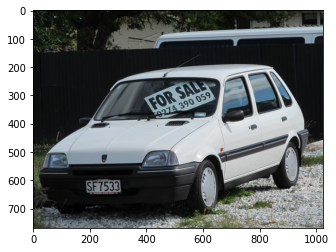

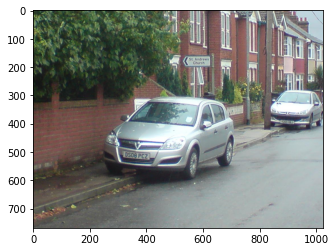

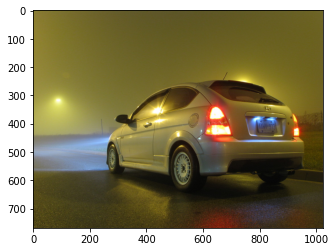

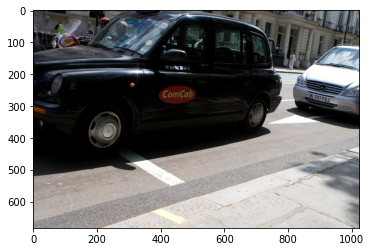

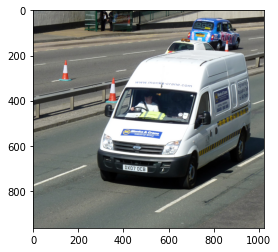

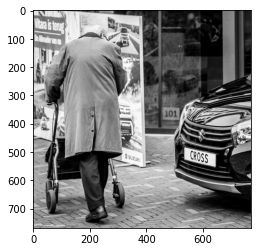

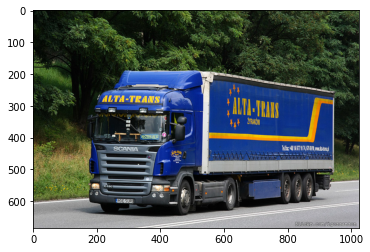

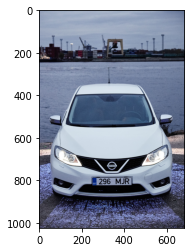

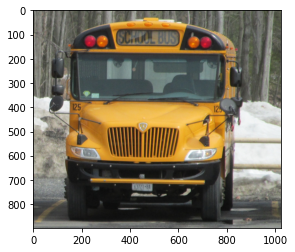

In [10]:
for i in list_data[:10]:
    img = cv2.imread(i)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

### yolo 로드

In [11]:
net = cv2.dnn.readNet('yolov4.weights','yolov4.cfg')
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [12]:
# 이미지 가져오기
img = cv2.imread(path+'/00009e5b390986a0.jpg')
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

In [13]:
# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

outs는 감지 결과이다. 탐지된 개체에 대한 모든 정보와 위치를 제공한다.

결과 화면에 표시 / 신뢰도, 신뢰 임계값  계산

In [14]:
# 정보를 화면에 표시
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # 좌표
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

신뢰도가 0.5 이상이라면 물체가 정확히 감지되었다고 간주한다. 아니라면 넘어감..

 

임계값은 0에서 1사이의 값을 가지는데

1에 가까울수록 탐지 정확도가 높고 , 0에 가까울수록 정확도는 낮아지지만 탐지되는 물체의 수는 많아진다.

In [15]:
## 노이즈제거
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

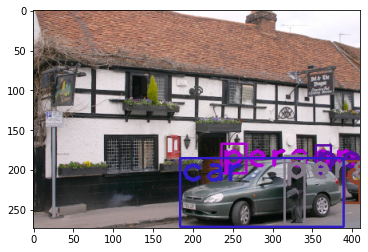

In [16]:
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)
#plt.imshow("Image", img)
#plt.show()

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

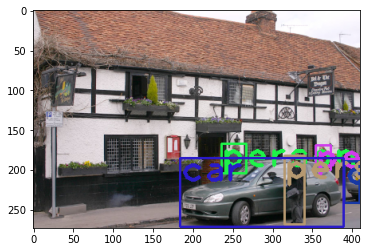

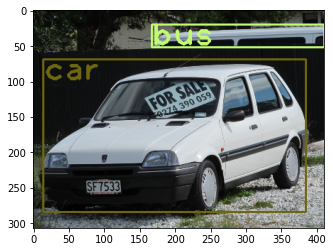

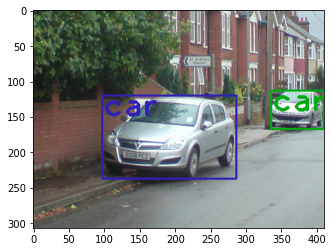

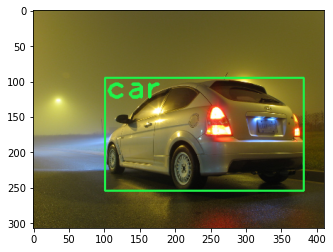

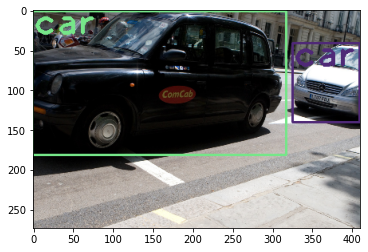

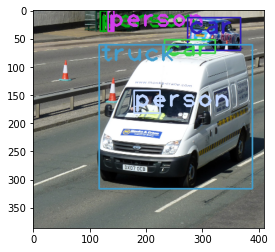

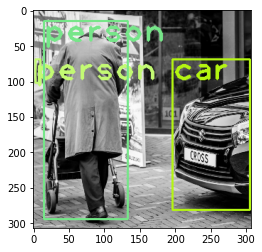

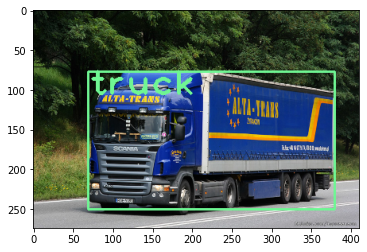

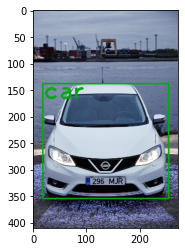

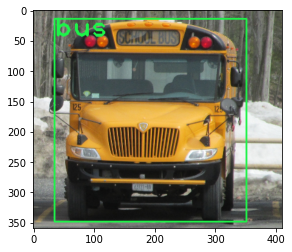

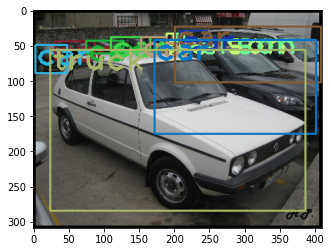

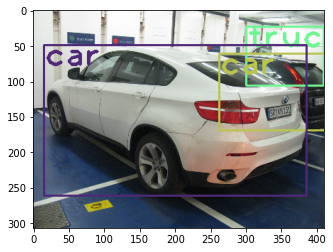

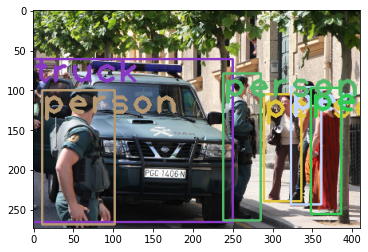

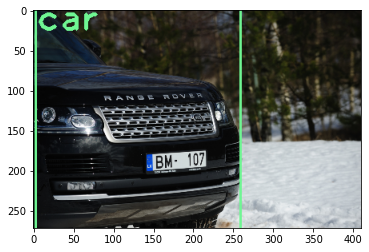

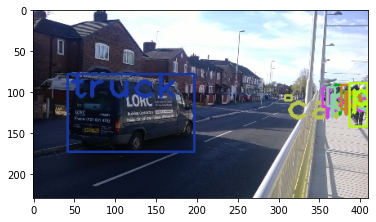

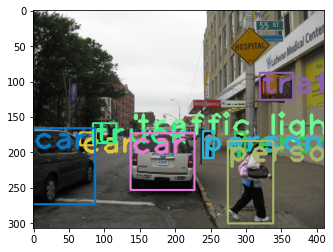

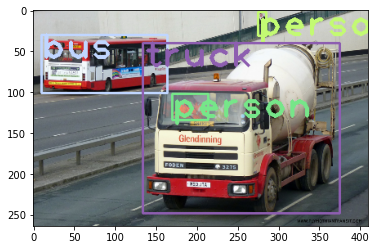

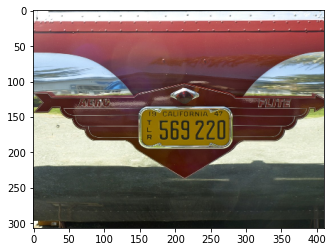

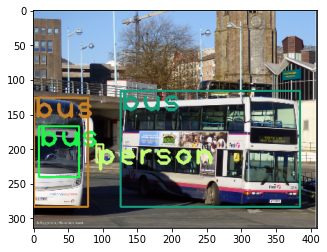

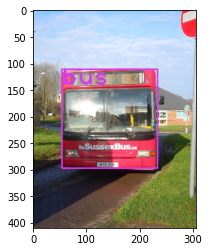

In [17]:
## 여러개


# yolo로드
net = cv2.dnn.readNet('yolov4.weights','yolov4.cfg')
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))



# 데이터가져오기
for i in list_data[0:20]:
    img = cv2.imread(i)
    img = cv2.resize(img, None, fx=0.4, fy=0.4)
    height, width, channels = img.shape

    # Detecting objects
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)
    
    # 정보를 화면에 표시
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                # 좌표
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    ## 노이즈제거
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)        
    
    
    font = cv2.FONT_HERSHEY_PLAIN
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = colors[i]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            cv2.putText(img, label, (x, y + 30), font, 3, color, 3)
#plt.imshow("Image", img)
#plt.show()

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()            

#### 비디오

In [5]:
import ipywidgets as widgets 
import IPython.display as display
import time

In [76]:
#비디오 객체 생성
path = '/data/open_dt'
cap = cv2.VideoCapture(path+'/sejong_drive.mp4')

 
#비디오 객체 정보 획득
frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('frame_size=',frame_size)

frame_size= (2048, 1536)


In [180]:
#Jupyter notebook에서 Widget 생성
wImg = widgets.Image(layout = widgets.Layout(border="solid") ) 
display.display(wImg) 

Image(value=b'', layout="Layout(border='solid')")

In [33]:
#비디오 객체 있을시
if cap.isOpened(): 
    #비디오 객체의 정보를 얻어옴
    ret, img = cap.read() 
    while ret: 
        try:
            # 동영상 파일에서 캡쳐된 이미지를 이미지 파일 스트림으로 다시 인코딩을 한다. 
            tmpStream = cv2.imencode(".jpeg", img)[1].tostring() 
            wImg.value = tmpStream 
            # 20 프레임이 되기 위한 딜레이 다만, 실제로 입력한 것보다 조금 더 딜레이가 있다 
            time.sleep(0.05)
            ret, img = cap.read()
        except KeyboardInterrupt:
            break
             
#비디오 객체 해제
cap.release()

/home/kyj1103/.conda/envs/kyj1103/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  


#### yolo적용

In [77]:
net = cv2.dnn.readNet('yolov4.weights','yolov4.cfg')
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [78]:
# 동영상 가져오기
#비디오 객체 생성

path = '/data/open_dt'
cap = cv2.VideoCapture(path+'/sejong_drive.mp4')
#cap = cv2.VideoCapture(path+'/pedestrian10.mp4')


frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('frame_size=',frame_size)

width, height = frame_size

#cap = cv2.resize(img, None, fx=0.4, fy=0.4)
#height, width, channels = cap.shape

frame_size= (2048, 1536)


In [79]:
#Jupyter notebook에서 Widget 생성
wImg = widgets.Image(layout = widgets.Layout(border="solid") ) 
display.display(wImg) 

Image(value=b'', layout="Layout(border='solid')")

In [80]:
#비디오 객체 있을시
if cap.isOpened(): 
    #비디오 객체의 정보를 얻어옴
    ret,img  = cap.read() 
    
    while ret: 
        try:
            # 동영상 파일에서 캡쳐된 이미지를 이미지 파일 스트림으로 다시 인코딩을 한다. 
            tmpStream = cv2.imencode(".jpeg", img)[1].tostring() 
            wImg.value = tmpStream 
            # 20 프레임이 되기 위한 딜레이 다만, 실제로 입력한 것보다 조금 더 딜레이가 있다 
            time.sleep(0.05)
            ret, img = cap.read()

            # Detecting objects
            blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
            net.setInput(blob)
            outs = net.forward(output_layers)

  
            # 정보를 화면에 표시
            class_ids = []
            confidences = []
            boxes = []
            for out in outs:
                for detection in out:
                    scores = detection[5:]
                    class_id = np.argmax(scores)
                    confidence = scores[class_id]
                    if confidence > 0.65:
                        # Object detected
                        center_x = int(detection[0] * width)
                        center_y = int(detection[1] * height)
                        w = int(detection[2] * width)
                        h = int(detection[3] * height)
                        # 좌표
                        x = int(center_x - w/2 )
                        y = int(center_y - h/2 )
                        boxes.append([x, y, w, h])
                        confidences.append(float(confidence))
                        class_ids.append(class_id)
            
            
            ## 노이즈제거
            indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
            
            
            font = cv2.FONT_HERSHEY_PLAIN
            for i in range(len(boxes)):
                if i in indexes:
                    x, y, w, h = boxes[i]
                    label = str(classes[class_ids[i]])
                    color = colors[i]
                    cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
                    cv2.putText(img, label, (x, y + 30), font, 3, color, 3)

                        
        except KeyboardInterrupt:
            break

#비디오 객체 해제
cap.release()

/home/kyj1103/.conda/envs/kyj1103/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  if __name__ == '__main__':


#### 함수로 만들기

In [7]:
def yolo(frame, size, score_threshold, nms_threshold):
    # YOLO 네트워크 불러오기
    net = cv2.dnn.readNet("yolov4.weights", "yolov4.cfg")
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

    # 클래스의 갯수만큼 랜덤 RGB 배열을 생성
    colors = np.random.uniform(0, 255, size=(len(classes), 3))

    # 이미지의 높이, 너비, 채널 받아오기
    height, width, channels = frame.shape

    # 네트워크에 넣기 위한 전처리
    blob = cv2.dnn.blobFromImage(frame, 0.00392, (size, size), (0, 0, 0), True, crop=False)

    # 전처리된 blob 네트워크에 입력
    net.setInput(blob)

    # 결과 받아오기
    outs = net.forward(output_layers)

    # 각각의 데이터를 저장할 빈 리스트
    class_ids = []
    confidences = []
    boxes = []

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            if confidence > 0.1:
                # 탐지된 객체의 너비, 높이 및 중앙 좌표값 찾기
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # 객체의 사각형 테두리 중 좌상단 좌표값 찾기
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # 후보 박스(x, y, width, height)와 confidence(상자가 물체일 확률) 출력
    print(f"boxes: {boxes}")
    print(f"confidences: {confidences}")

    # Non Maximum Suppression (겹쳐있는 박스 중 confidence 가 가장 높은 박스를 선택)
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, score_threshold=score_threshold, nms_threshold=nms_threshold)
    
    # 후보 박스 중 선택된 박스의 인덱스 출력
    print(f"indexes: ", end='')
    for index in indexes:
        print(index, end=' ')
    print("\n\n============================== classes ==============================")

    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            class_name = classes[class_ids[i]]
            label = f"{class_name} {confidences[i]:.2f}"
            color = colors[class_ids[i]]

            # 사각형 테두리 그리기 및 텍스트 쓰기
            cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
            cv2.rectangle(frame, (x - 1, y), (x + len(class_name) * 13 + 65, y - 25), color, -1)
            cv2.putText(frame, label, (x, y - 8), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 0, 0), 2)
            
            # 탐지된 객체의 정보 출력
            print(f"[{class_name}({i})] conf: {confidences[i]} / x: {x} / y: {y} / width: {w} / height: {h}")

    return frame

In [8]:
# 클래스 리스트
classes = ["person", "bicycle", "car", "motorcycle",
           "airplane", "bus", "train", "truck", "boat", "traffic light", "fire hydrant",
           "stop sign", "parking meter", "bench", "bird", "cat", "dog", "horse",
           "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack",
           "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis",
           "snowboard", "sports ball", "kite", "baseball bat", "baseball glove", "skateboard",
           "surfboard", "tennis racket", "bottle", "wine glass", "cup", "fork", "knife",
           "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog",
           "pizza", "donut", "cake", "chair", "couch", "potted plant", "bed", "dining table",
           "toilet", "tv", "laptop", "mouse", "remote", "keyboard",
           "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator",
           "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"]

# 이미지 경로
path = '/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate'
img = cv2.imread(path+'/00009e5b390986a0.jpg')
#office = "C:\\Users\\user\\Pictures\\Saved Pictures\\sample_image\\office.jpg"

# 이미지 읽어오기
frame = cv2.imread(path+'/00009e5b390986a0.jpg')

# 입력 사이즈 리스트 (Yolo 에서 사용되는 네크워크 입력 이미지 사이즈)
size_list = [320, 416, 608]


boxes: [[925, 303, 96, 47], [922, 301, 102, 51], [591, 416, 79, 96], [593, 417, 79, 94], [886, 425, 47, 75], [887, 425, 46, 75], [928, 448, 47, 24], [928, 447, 48, 25], [928, 447, 48, 25], [592, 418, 78, 97], [594, 419, 78, 95], [886, 429, 48, 76], [886, 428, 47, 77], [979, 462, 43, 126], [979, 463, 44, 124], [978, 474, 46, 120], [977, 471, 47, 126], [978, 484, 46, 114], [978, 482, 46, 117], [792, 555, 41, 33], [792, 555, 41, 33], [793, 555, 40, 33], [906, 305, 117, 50], [906, 305, 117, 50], [505, 329, 152, 44], [503, 329, 155, 43], [503, 328, 155, 49], [593, 417, 75, 93], [593, 417, 75, 93], [594, 417, 73, 93], [886, 423, 47, 78], [887, 423, 46, 78], [885, 423, 51, 80], [926, 449, 50, 24], [593, 418, 76, 97], [593, 418, 76, 97], [593, 418, 76, 97], [886, 429, 50, 75], [885, 429, 50, 75], [978, 435, 46, 163], [978, 436, 46, 161], [978, 434, 45, 164], [978, 459, 46, 141], [978, 460, 46, 140], [978, 458, 46, 143], [794, 466, 49, 169], [793, 466, 52, 170], [978, 480, 45, 122], [978, 480, 

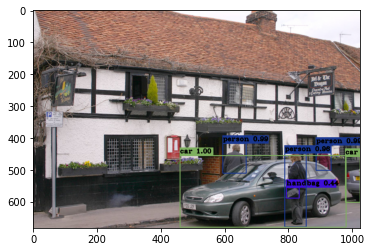

In [9]:
frame = yolo(frame=frame, size=size_list[2], score_threshold=0.4, nms_threshold=0.4)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()


#cv2.imshow("Output_Yolo", frame)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

#### 위젯관련

In [ ]:
#비디오 객체 생성
cap = cv2.VideoCapture('./data/test.mp4') 
#비디오 객체 정보 획득
frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('frame_size=',frame_size)

#Jupyter notebook에서 Widget 생성
wImg = widgets.Image(layout = widgets.Layout(border="solid") ) 
display.display(wImg) 

#비디오 객체 있을시
if cap.isOpened(): 
    #비디오 객체의 정보를 얻어옴
    ret, img = cap.read() 
    while ret: 
        try:
            # 동영상 파일에서 캡쳐된 이미지를 이미지 파일 스트림으로 다시 인코딩을 한다. 
            tmpStream = cv2.imencode(".jpeg", img)[1].tostring() 
            wImg.value = tmpStream 
            # 20 프레임이 되기 위한 딜레이 다만, 실제로 입력한 것보다 조금 더 딜레이가 있다 
            time.sleep(0.05)
            ret, img = cap.read()
        except KeyboardInterrupt:
            break

#비디오 객체 해제
cap.release()

In [ ]:
from ipywidgets import Layout, Button, Box, VBox, Label

#비디오 객체 생성
cap = cv2.VideoCapture('./data/test.mp4') 
#비디오 객체의 특성 출력
frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('frame_size=',frame_size)

#저장할 비디오 출력을 위한 코덱
fourcc = cv2.VideoWriter_fourcc(*'DVIX')

#fps를 20.0 frame크기를 원본 동영상과 같이 설정
out1 = cv2.VideoWriter('./data/record0.mp4',fourcc,20.0,frame_size)
#하나의 비디오는 Color가아닌 Grayscale로서 저장
out2 = cv2.VideoWriter('./data/record1.mp4',fourcc,20.0,frame_size,isColor = False)

#Jupyter Notebook에서 확인할 Widget 설정
items_layout = Layout( width='auto')

box_layout = Layout(display='flex',
                    flex_flow='row',
                    border='solid',
                   width='100%',)

wImg1 = widgets.Image(layout = widgets.Layout(border="solid"), width="50%") 
wImg2 = widgets.Image(layout = widgets.Layout(border="solid"), width="50%") 

items = [wImg1, wImg2]
box = Box(children=items)

display.display(box) 

#저장하면서 동영상의 출력
while True:
    try:
        retval, frame = cap.read()
        if not retval:
            break
        
        out1.write(frame)
        tmpStream = cv2.imencode(".jpeg", frame)[1].tostring()
        wImg1.value = tmpStream
    
        gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        out2.write(gray)
    
        tmpStream = cv2.imencode(".jpeg", gray)[1].tostring()
        wImg2.value = tmpStream
    
    except KeyboardInterrupt:
        break
            
cap.release()

In [ ]:
_______________- 나중에 참고-----------------------------

In [ ]:
import cv2
import time

CONFIDENCE_THRESHOLD = 0.2
NMS_THRESHOLD = 0.4
COLORS = [(0, 255, 255), (255, 255, 0), (0, 255, 0), (255, 0, 0)]

class_names = []
with open("coco.names", "r") as f:
    class_names = [cname.strip() for cname in f.readlines()]

    
path = '/data/open_dt'
vc = cv2.VideoCapture(path+'/pedestrian10.mp4')


net = cv2.dnn.readNet("yolov4.weights", "yolov4.cfg")
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA_FP16)

model = cv2.dnn_DetectionModel(net)
model.setInputParams(size=(416, 416), scale=1/255, swapRB=True)

while cv2.waitKey(1) < 1:
    (grabbed, frame) = vc.read()
    if not grabbed:
        exit()

    start = time.time()
    classes, scores, boxes = model.detect(frame, CONFIDENCE_THRESHOLD, NMS_THRESHOLD)
    end = time.time()

    start_drawing = time.time()
    for (classid, score, box) in zip(classes, scores, boxes):
        color = COLORS[int(classid) % len(COLORS)]
        label = "%s : %f" % (class_names[classid[0]], score)
        cv2.rectangle(frame, box, color, 2)
        cv2.putText(frame, label, (box[0], box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    end_drawing = time.time()
    
    fps_label = "FPS: %.2f (excluding drawing time of %.2fms)" % (1 / (end - start), (end_drawing - start_drawing) * 1000)
    cv2.putText(frame, fps_label, (0, 25), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
    cv2.imshow("detections", frame)    

In [8]:
import cv2
import numpy as np

# 웹캠 신호 받기
VideoSignal = cv2.VideoCapture(0)
# YOLO 가중치 파일과 CFG 파일 로드
YOLO_net = cv2.dnn.readNet("yolov4.weights","yolov4.cfg")

# YOLO NETWORK 재구성
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = YOLO_net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in YOLO_net.getUnconnectedOutLayers()]

while True:
    # 웹캠 프레임
    ret, frame = VideoSignal.read()
    h, w, c = frame.shape()

    # YOLO 입력
    blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0),
    True, crop=False)
    YOLO_net.setInput(blob)
    outs = YOLO_net.forward(output_layers)

    class_ids = []
    confidences = []
    boxes = []

    for out in outs:

        for detection in out:

            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            if confidence > 0.5:
                # Object detected
                center_x = int(detection[0] * w)
                center_y = int(detection[1] * h)
                dw = int(detection[2] * w)
                dh = int(detection[3] * h)
                # Rectangle coordinate
                x = int(center_x - dw / 2)
                y = int(center_y - dh / 2)
                boxes.append([x, y, dw, dh])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.45, 0.4)


    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            score = confidences[i]

            # 경계상자와 클래스 정보 이미지에 입력
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 5)
            cv2.putText(frame, label, (x, y - 20), cv2.FONT_ITALIC, 0.5, 
            (255, 255, 255), 1)

    #cv2.imshow("YOLOv3", frame)
    plt.imshow('yolo3',frame)
    plt.show()
    
    if cv2.waitKey(100) > 0:
        break

AttributeError: 'NoneType' object has no attribute 'shape'

##### 파일리스트 불러오기

In [37]:
path = '/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate'
list_data = sorted_list(os.path.join(path,'*.jpg'))

In [40]:
path2 = '/data/open_dt/korea_lp/OID_plate_5k/Dataset/validation/Vehicle registration plate'
list_data2 = sorted_list(os.path.join(path2,'*.jpg'))

In [41]:
list_data2

['/data/open_dt/korea_lp/OID_plate_5k/Dataset/validation/Vehicle registration plate/003a5aaf6d17c917.jpg',
 '/data/open_dt/korea_lp/OID_plate_5k/Dataset/validation/Vehicle registration plate/00723dac8201a83e.jpg',
 '/data/open_dt/korea_lp/OID_plate_5k/Dataset/validation/Vehicle registration plate/008637722500f239.jpg',
 '/data/open_dt/korea_lp/OID_plate_5k/Dataset/validation/Vehicle registration plate/0170ea8e1a33375a.jpg',
 '/data/open_dt/korea_lp/OID_plate_5k/Dataset/validation/Vehicle registration plate/017527da8bfeb97d.jpg',
 '/data/open_dt/korea_lp/OID_plate_5k/Dataset/validation/Vehicle registration plate/02a6ef3d9bd68e91.jpg',
 '/data/open_dt/korea_lp/OID_plate_5k/Dataset/validation/Vehicle registration plate/03b7b71e1ffcb7a8.jpg',
 '/data/open_dt/korea_lp/OID_plate_5k/Dataset/validation/Vehicle registration plate/044417ca6134604f.jpg',
 '/data/open_dt/korea_lp/OID_plate_5k/Dataset/validation/Vehicle registration plate/057569768fd6303e.jpg',
 '/data/open_dt/korea_lp/OID_plate_5k

In [35]:
list_data


['/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/00009e5b390986a0.jpg',
 '/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/000228608388803f.jpg',
 '/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/0002a5b67e5f0909.jpg',
 '/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/00043e7c5c4c025a.jpg',
 '/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/0005ea10e0e14db1.jpg',
 '/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/0006dc0977056410.jpg',
 '/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/00071c51c8e92a68.jpg',
 '/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/00072b81abc72d21.jpg',
 '/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/0007870724402b51.jpg',
 '/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/000

In [45]:
import glob


# 대상 폴더
image_directory = '/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/'

# 확장자
extension = "*.jpg"

# 텍스트 파일이 저장될 경로
save_at = "/home/kyj1103/darknet/data/bdd_train.txt"

# 대상 폴더에서 지정한 확장자를 가진 파일들의 경로를 리스트화
files = sorted(glob.glob(image_directory + extension))

# 파일들의 경로를 텍스트 파일에 추가 및 출력
for file in files:
    f = open(save_at, 'a')
    f.write(file + "\n")
    print(file)

/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/00009e5b390986a0.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/000228608388803f.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/0002a5b67e5f0909.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/00043e7c5c4c025a.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/0005ea10e0e14db1.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/0006dc0977056410.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/00071c51c8e92a68.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/00072b81abc72d21.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/0007870724402b51.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/000812dcf304a8e7.jpg
/data/open_dt/korea_

/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/31863aa5fb886d1b.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/3187884be4815adc.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/31a3b2b863bb7884.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/31add810a9b07007.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/31c8f86a68921243.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/31cbe9cca83813fa.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/31d9e2f1e48283fd.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/31de4a0f63d56b70.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/31fb447ce4a25850.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/3225f6ab897858fb.jpg
/data/open_dt/korea_

/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/90e2a8c82d013e69.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/90e679a1d81a3c2e.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/90ea68117f026876.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/90fac06fd683dd1f.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/910f9701bf3bfd03.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/91205cd3170ee777.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/912bb88ab06023fc.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/913e31b5828c95a8.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/9143895eb518ec1c.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/91495c44b38fa688.jpg
/data/open_dt/korea_

/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/edfe19a0a215a573.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/ee03b12cc889bcc1.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/ee03fa959ca160e6.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/ee04d0334b665e35.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/ee1e050d1c504a25.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/ee2fe9ac5b387fba.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/ee3bb64e14fee8ec.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/ee5ddc31dca94d18.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/ee5efc6ec568aca3.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/train/Vehicle registration plate/ee61f10124dfc83b.jpg
/data/open_dt/korea_

In [47]:
import glob


# 대상 폴더
image_directory = '/data/open_dt/korea_lp/OID_plate_5k/Dataset/validation/Vehicle registration plate/'

# 확장자
extension = "*.jpg"

# 텍스트 파일이 저장될 경로
save_at = "/home/kyj1103/darknet/data/bdd_val.txt"

# 대상 폴더에서 지정한 확장자를 가진 파일들의 경로를 리스트화
files = sorted(glob.glob(image_directory + extension))

# 파일들의 경로를 텍스트 파일에 추가 및 출력
for file in files:
    f = open(save_at, 'a')
    f.write(file + "\n")
    print(file)

/data/open_dt/korea_lp/OID_plate_5k/Dataset/validation/Vehicle registration plate/003a5aaf6d17c917.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/validation/Vehicle registration plate/00723dac8201a83e.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/validation/Vehicle registration plate/008637722500f239.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/validation/Vehicle registration plate/0170ea8e1a33375a.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/validation/Vehicle registration plate/017527da8bfeb97d.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/validation/Vehicle registration plate/02a6ef3d9bd68e91.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/validation/Vehicle registration plate/03b7b71e1ffcb7a8.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/validation/Vehicle registration plate/044417ca6134604f.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/validation/Vehicle registration plate/057569768fd6303e.jpg
/data/open_dt/korea_lp/OID_plate_5k/Dataset/validation/Vehicle registrati

#### 학습결과 출력

351it [00:00, 810237.04it/s]
100%|██████████| 95/95 [00:00<00:00, 298247.66it/s]


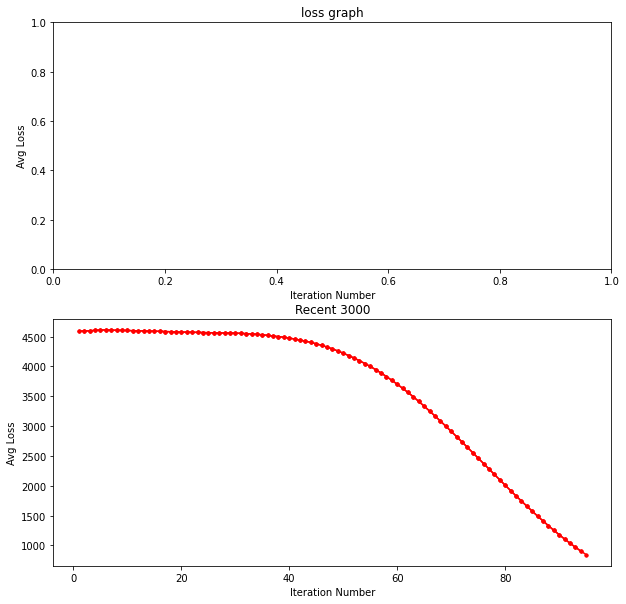

In [7]:
import sys 
import matplotlib.pyplot as plt
from tqdm import tqdm 


lines = [] 
for line in tqdm(open('/home/kyj1103/darknet/backup/train.log')): 
    if "avg" in line: 
        lines.append(line) 
        
iterations = [] 
avg_loss = [] 
line_cnt=len(lines) 


for i in tqdm(range(line_cnt)): 
    lineParts = lines[i].split(',') 
    iterations.append(int(lineParts[0].split(':')[0])) 
    avg_loss.append(float(lineParts[1].split()[0])) 
    
fig ,ax = plt.subplots(2,1 , figsize = (10,10))



#start = 0 
start = 4999 

for i in range(start, line_cnt, 1000): 
    ax[0].plot(iterations[i:i+1], avg_loss[i:i+1], 'r*-') 
    #print(iterations[i], avg_loss[i]) 
    ax[0].text(iterations[i], avg_loss[i],str(iterations[i])) 
    
ax[0].set_xlabel('Iteration Number') 
ax[0].set_ylabel('Avg Loss') 
ax[0].set_title('loss graph') 


for i in range(line_cnt-3000,line_cnt,): 
    ax[1].plot(iterations[i:i+2], avg_loss[i:i+2], 'r.-') 
    ax[1].set_xlabel('Iteration Number') 
    ax[1].set_ylabel('Avg Loss') 
    ax[1].set_title('Recent 3000') #fig.savefig('training_loss_plot.png', dpi=1000)

    


#### 다크넷 학습 명령어

In [ ]:
./darknet detector train data/obj.data cfg/yolov3.cfg darknet53.conv.74
./darknet detector train data/obj.data cfg/yolov4-csp.cfg darknet53.conv.74

./darknet detector train data/obj.data cfg/yolov4.cfg darknet53.conv.74 -gups 0,1

./darknet detector train data/obj2.data cfg/yolov3.cfg darknet53.conv.74
./darknet detector train data/obj.data cfg/yolov4.cfg darknet53.conv.74



darknet.exe detector train .data .cfg .weights -map
./darknet detector train data/obj.data cfg/yolov4.cfg darknet53.conv.74 | tee backup/train.log


./darknet detector train data/obj.data cfg/yolov4.cfg darknet53.conv.74 -mjpeg_port 8090 -map



#### 다크넷 실제 예측 명령어


In [ ]:
./darknet detector test data/obj.data cfg backup/yolo4_final.weights data/dd20fad62dbf661c.jpg


./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/deebd66e28aecfaa.jpg

./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights -ext_output -dont_show -out result.json 

In [ ]:


./darknet detector test data/obj.data cfg/yolov4.cfg backup/yolov4_final.weights data/dd20fad62dbf661c.jpg 
./darknet detector test data/obj.data cfg/yolov4.cfg yolov4.weights data/dd20fad62dbf661c.jpg 
./darknet detector test data/obj.data cfg/yolov4.cfg yolov4.weights data/dd20fad62dbf661c.jpg -ext_output -dont_show -out data/result.json 

In [10]:
!/home/kyj1103/darknet detector test data/obj.data cfg/yolov4.cfg yolov4.weights data/dd20fad62dbf661c.jpg

/bin/bash: /home/kyj1103/darknet: Is a directory


In [ ]:
./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights -ext_output -dont_show -out result.json